# Review : Exploratory Data Analysis con Pandas y Preprocessing
#### UD1. Introducción al Machine Learning
#### MP. Sistemas de Aprendizaxe Automático
#### IES de Teis (Vigo), Vanesa Resúa Eiras, Cristina Gómez Alonso

En este cuarto notebook repasaremos los conceptos trabajados anteriormente


### *Ejercicio 0: Importación*

Carga en un dataframe el fichero adults.csv y muestra las primeras 10 filas.

In [2]:
import pandas as pd

df = pd.read_csv('data/adult.csv')

### *Ejercicio 1: Datos generales*

1. ¿Cuántas filas y columnas tiene el dataset?

In [3]:
df.shape

(32560, 15)

2. Muestra información detallada de cada columna. Para cada tipo de datos, ¿Cuántas columnas tienes de dicho tipo?

In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32559.000000,3.256000e+04,32554.000000,32560.000000,32560.000000,32552.000000
mean,38.582266,1.897818e+05,10.080482,1077.615172,87.306511,40.438345
std,13.640374,1.055498e+05,2.572830,7385.402999,402.966116,12.346980
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


3. Muestra información estadística de cada columna numérica y responde a las siguientes preguntas.¿Cuantos años tiene el usuario más mayor y el más joven? ¿Cuál es la mayor ganancia para un usuario? ¿En qué cuartil se superan las 40h semanales de trabajo?

In [18]:
df.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32559.000000,3.256000e+04,32554.000000,32560.000000,32560.000000,32552.000000
mean,38.582266,1.897818e+05,10.080482,1077.615172,87.306511,40.438345
std,13.640374,1.055498e+05,2.572830,7385.402999,402.966116,12.346980
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


4. ¿Existen nulos en alguna de las columnas?

In [11]:
## yeah
df.isnull().any()

age                True
workclass         False
fnlwgt            False
education         False
education-num      True
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week     True
native-country    False
gains             False
dtype: bool

### *Ejercicio 3: Índices*

1. ¿Qué valores diferentes tiene la columna relationship? ¿En qué proporción?

In [33]:
print(df['relationship'].unique())
df.relationship.value_counts()


[' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


relationship
Husband           13193
Not-in-family      8304
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

2. ¿Y la columna native-country?

In [32]:
print(df['native-country'].unique())
df['native-country'].value_counts()

[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


native-country
United-States                 29169
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

3. Crea un nuevo dataframe llamado adults_new_index con un índice para las columna relationship y native-country.

In [104]:

adults_new_index = df.copy()
adults_new_index.set_index(['relationship', 'native-country'], inplace=True, drop=False)
adults_new_index['marital-status'].value_counts()

marital-status
Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

### *Ejercicio 4: Selección de datos específicos por columna/fila*

1. Muestra los datos exclusivamente de las columnas edad, sexo y ganancias.
2. Sobre el conjunto anterior muestra las últimas 10 filas.

In [53]:
df_copy = df.loc[:,('age','sex','capital-gain')]
df_copy.tail(10)

,age,sex,capital-gain
32550,32.0,Male,0
32551,43.0,Male,0
32552,32.0,Male,0
32553,53.0,Male,0
32554,22.0,Male,0
32555,27.0,Female,0
32556,40.0,Male,0
32557,58.0,Female,0
32558,22.0,Male,0
32559,52.0,Female,15024


3. Muestra los datos de las columnas primera, segunda, tercera y quinta para las 100 primeras filas. Ordena el resultado de forma descendente por edad.

In [64]:
df.iloc[:100, [0,1,2,4]].sort_values('age',ascending=False)

,age,workclass,fnlwgt,education-num
73,79.0,Private,124744,10.0
99,76.0,Private,124191,14.0
76,67.0,?,212759,6.0
82,59.0,Private,159937,9.0
23,59.0,Private,109015,9.0
...,...,...,...,...
36,19.0,Private,544091,9.0
69,19.0,Private,101509,10.0
77,18.0,Private,309634,7.0
79,18.0,Private,446839,9.0


4. Muestra las 4 últimas columnas para todas las filas.

In [70]:
df.iloc[-4:]


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,gains
32556,40.0,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40.0,United-States,>50K
32557,58.0,Private,151910,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States,<=50K
32558,22.0,Private,201490,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0,0,20.0,United-States,<=50K
32559,52.0,Self-emp-inc,287927,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40.0,United-States,>50K


5. Utilizando el dataframe que has creado en el ejercicio 3.3, recupera el número de usuarios/as de nacionalidad cubana y solteros/as.  ¿Cómo lo harías sobre el dataframe adults que no tiene dicho índice?

In [5]:
adults_new_index.loc[:,['Unmarried','Cuba']]

NameError: name 'adults_new_index' is not defined

6. EXTRA1: Busca todas aquellas mujeres solteras de nacionalidad cubana

In [107]:
adults_new_index[(adults_new_index['marital-status']=='Never-married')]


age          workclass  fnlwgt    education  \
relationship  native-country                                                 
Husband       United-States   50.0   Self-emp-not-inc   83311    Bachelors   
Not-in-family United-States   38.0            Private  215646      HS-grad   
Husband       United-States   53.0            Private  234721         11th   
Wife          Cuba            28.0            Private  338409    Bachelors   
              United-States   37.0            Private  284582      Masters   
...                            ...                ...     ...          ...   
              United-States   27.0            Private  257302   Assoc-acdm   
Husband       United-States   40.0            Private  154374      HS-grad   
Unmarried     United-States   58.0            Private  151910      HS-grad   
Own-child     United-States   22.0            Private  201490      HS-grad   
Wife          United-States   52.0       Self-emp-inc  287927      HS-grad   

                              education-num       marital-status  \
relationship  native-country                                       
Husband       United-States            13.0   Married-civ-spouse   
Not-in-family United-States             9.0             Divorced   
Husband       United-States             7.0   Married-civ-spouse   
Wife          Cuba                     13.0   Married-civ-spouse   
              United-States            14.0   Married-civ-spouse   
...                                     ...                  ...   
              United-States            12.0   Married-civ-spouse   
Husband       United-States             9.0   Married-civ-spouse   
Unmarried     United-States             9.0              Widowed   
Own-child     United-States             9.0        Never-married   
Wife          United-States             9.0   Married-civ-spouse   

                                      occupation    relationship    race  \
relationship  native-country                                               
Husband       United-States      Exec-managerial         Husband   White   
Not-in-family United-States    Handlers-cleaners   Not-in-family   White   
Husband       United-States    Handlers-cleaners         Husband   Black   
Wife          Cuba                Prof-specialty            Wife   Black   
              United-States      Exec-managerial            Wife   White   
...                                          ...             ...     ...   
              United-States         Tech-support            Wife   White   
Husband       United-States    Machine-op-inspct         Husband   White   
Unmarried     United-States         Adm-clerical       Unmarried   White   
Own-child     United-States         Adm-clerical       Own-child   White   
Wife          United-States      Exec-managerial            Wife   White   

                                  sex  capital-gain  capital-loss  \
relationship  native-country                                        
Husband       United-States      Male             0             0   
Not-in-family United-States      Male             0             0   
Husband       United-States      Male             0             0   
Wife          Cuba             Female             0             0   
              United-States    Female             0             0   
...                               ...           ...           ...   
              United-States    Female             0             0   
Husband       United-States      Male             0             0   
Unmarried     United-States    Female             0             0   
Own-child     United-States      Male             0             0   
Wife          United-States    Female         15024             0   

                              hours-per-week  native-country   gains  
relationship  native-country                                          
Husband       United-States             13.0   United-States   <=50K  
Not-in-family United-States    

7. EXTRA2: Busca todas aquellas mujeres solteras de nacionalidad cubana que trabajen más de 40 horas a la semana

8. EXTRA3: Crea un nuevo dataframe que contenga exclusivamente a aquellos usuarios con nacionalidad portuguesa, francesa o nord-americana. Pista: utiliza la función isin. Borra las columnas occupation, capital-gain y capital-loss. Crea una nueva columna 'age-range' que tome los valores young para usuarios menores de 30 años, old para mayores de 60 y intermediate en cualquier otro caso.

9. EXTRA4: Busca información sobre las funciones isnull, dropna y fillna. ¿Para qué se utilizan? Por un ejemplo interesante para cada una de ellas dónde se demuestre su utilidad.

### *Ejercicio 5: Agrupaciones*

1. Tomando los datos presentes en este dataset, ¿Cuál es la nacionalidad que tiene una mayor media de edad? ¿Y menor media?


In [6]:
df.groupby(['native-country','age'])[['age']].mean().sort_values('age',axis=1,ascending=False)

KeyError: 'age'

### *Ejercicio 6: Gráficos*

1. Para cada columna (o feature) numérica, crea un gráfico de barras que muestre su distribución de valores.


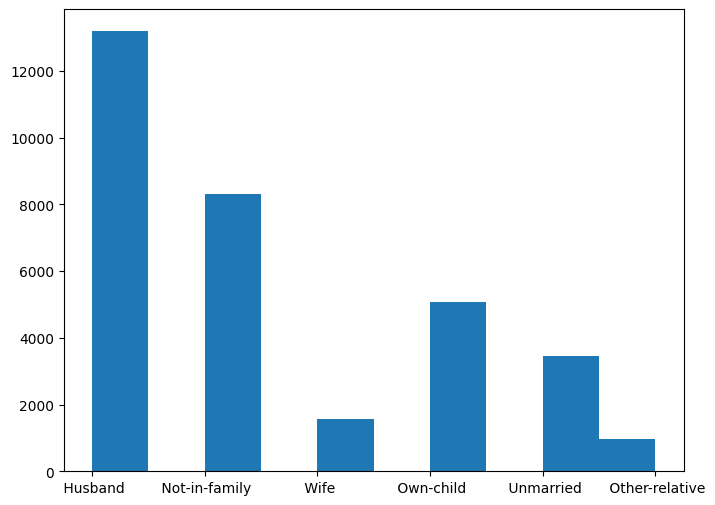

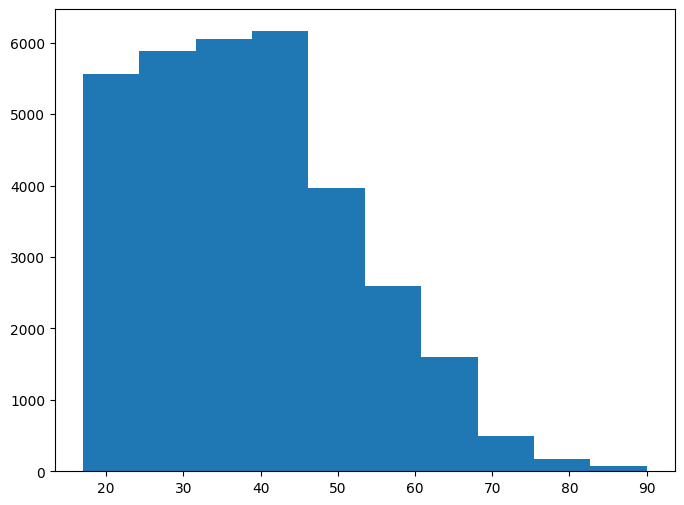

<bound method DataFrame.info of         age          workclass  fnlwgt    education  education-num  \
0      50.0   Self-emp-not-inc   83311    Bachelors           13.0   
1      38.0            Private  215646      HS-grad            9.0   
2      53.0            Private  234721         11th            7.0   
3      28.0            Private  338409    Bachelors           13.0   
4      37.0            Private  284582      Masters           14.0   
...     ...                ...     ...          ...            ...   
32555  27.0            Private  257302   Assoc-acdm           12.0   
32556  40.0            Private  154374      HS-grad            9.0   
32557  58.0            Private  151910      HS-grad            9.0   
32558  22.0            Private  201490      HS-grad            9.0   
32559  52.0       Self-emp-inc  287927      HS-grad            9.0   

            marital-status          occupation    relationship    race  \
0       Married-civ-spouse     Exec-managerial       

In [9]:
import matplotlib.pyplot as plt

def showPlotOf(column):
    plt.figure(figsize=(8,6))
    plt.hist(column)
    plt.show()

showPlotOf(df['relationship'])
showPlotOf(df['age'])

df.info

2. EXTRA: A continuación tienes un código que crea gráficos que muestran la distribución de las ganancias respecto al resto de columnas. Extrae conclusiones de los resultados y propón realizar estos gráficos para otra columna que consideres de interés.

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
#
# df_numerics = adults.select_dtypes(include = np.number)
#
# figure=plt.figure(figsize = (15, 6))
#
# for i, column in enumerate(df_numerics.columns, 1):
#     axes = figure.add_subplot(3,3,i)
#     sns.kdeplot(x = df_numerics[column], hue = adults['gains'], fill = True, ax = axes)
#     figure.tight_layout()

### *Ejercicio 7: Valores missing*

1. Gestiona los valores nulos con la técnica del rellenado. ¿Qué valores piensas que deberían de tener los nulos presentes en el dataset?

In [16]:
df.isnull().sum()
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32559.000000,3.256000e+04,32554.000000,32560.000000,32560.000000,32552.000000
mean,38.582266,1.897818e+05,10.080482,1077.615172,87.306511,40.438345
std,13.640374,1.055498e+05,2.572830,7385.402999,402.966116,12.346980
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [50]:
def replaceByI(col):
    col.fillna(col.mean(), inplace = True)

replaceByI(df['age'])
replaceByI(df['education-num'])
replaceByI(df['hours-per-week'])


2. Borra las columnas fnlwgt, education, capital_gain y capital_loss.

In [54]:
df.drop(columns=['fnlwgt', 'education','capital-gain', 'capital-loss'], inplace=True)

KeyError: "['fnlwgt', 'education', 'capital-gain', 'capital-loss'] not found in axis"

### *Ejercicio 8: Datos categóricos*

1. Transforma todas las columnas categóricas a numéricas con un LabelEncoder.

### *Ejercicio 9: Escalado de los datos*

1. EXTRA1: Divide el dataset en 4 grupos (training y testing).
2. EXTRA2: Escala las columnas categóricas con un StandardScaler.

# Webgrafía


[Curso de Cesar Guirò](https://cesguiro.es/doku.php?id=clase:ia:saa:start)
[Curso de Luz Frías](https://github.com/koldLight/curso-python-analisis-datos)
[Curso de Tirtjakupto Sarkar](https://github.com/tirthajyoti/Machine-Learning-with-Python)
[DataCamp](https://www.datacamp.com/)


# Licencia

[Attributon-ShacerAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)

Puedes utilizar libremente este material, con las siguientes condiciones:

* Atribuir la autoría a este documento.
* Si lo utilizas y haces cambios, deberás liberarlo también bajo la misma licencia.